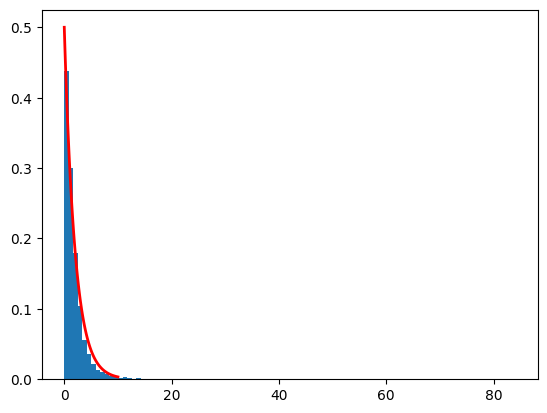

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera
from scipy.stats import norm, chi2

# generate data from a normal distribution for skewness
N = 10000 # number of samples
n = 200   # number of size
x = np.random.normal(0, 1, (N, n))  # 生成 N rows n columns 的数据

G1 = np.sqrt(n / 6) * skew(x, axis = 1, bias = True) # compute skewness for each row
G2 = np.sqrt(n / 24) * (kurtosis(x, axis = 1, bias = True, fisher = True))
# s = skew(x, bias = True)
# k = kurtosis(x, bias = True, fisher = True)
# G3 = (n / 6) * ((s ** 2) + ((k ** 2) / 4))
G3 = G1**2 + G2**2

plt.hist(G3, bins = 100, density = True)
x = np.linspace(0, 10, 100)
plt.plot(x, chi2.pdf(x, 2), 'r-', lw = 2)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera
from scipy.stats import norm, chi2, uniform, t

# generate data from a normal distribution for skewness
N = 10000 # number of samples
n = 200   # number of size
x = np.random.normal(0, 1, (N, n))  # 生成 N rows n columns 的数据

G1 = np.sqrt(n / 6) * skew(x, axis = 1, bias = True) # compute skewness for each row
G2 = np.sqrt(n / 24) * (kurtosis(x, axis = 1, bias = True, fisher = True))
G3 = G1**2 + G2**2
stats = G3
p_val = 1 - chi2.cdf(G3, df = 2)

In [ ]:
# define a function to compute the G3 statistic, return the statistic and p-value
def G3_stat(X):
    """
    Input:
        X: A numpy array of shape (N, n) where N is the number of samples and n is the size of each sample
    Output:
        G3: A numpy array of shape (N,) that contains the G3 statistic for each sample
        p_val: A numpy array of shape (N,) that contains the p-value for each sample
    """
    n = X.shape[1]
    G1 = np.sqrt(n / 6) * skew(X, axis = 1, bias = True) # compute skewness for each row
    G2 = np.sqrt(n / 24) * (kurtosis(X, axis = 1, bias = True, fisher = True))
    G3 = G1 ** 2 + G2 ** 2
    p_val = 1 - chi2.cdf(G3, df = 2)  # chi2.cdf 是指從 0 到 G3 的面積，1 - chi2.cdf 是指從 G3 到無限大的面積
    return G3, p_val

distributions = {
    'StandNorm': lambda size: norm.rvs(loc = 0, scale = 1, size = size),
    'T(3)': lambda size: t.rvs(df = 3, size = size),
    'T(10)': lambda size: t.rvs(df = 10, size = size),
    'T(30)': lambda size: t.rvs(df = 30, size = size),
    'Unif(0, 1)': lambda size: uniform.rvs(loc = 0, scale = 1, size = size),
    'Chisq(8)': lambda size: chi2.rvs(df = 8, size = size)
}
# # 選擇分佈
# distribution_name = 'StandNorm'  # 可以更改為 'T(3)', 'T(10)', 'T(30)', 'Unif(0, 1)', 'Chisq(8)'
# N = 10  # number of samples
# n_values = [10, 20, 30, 50, 100, 300, 500, 1000]  # sample sizes
# # 生成數據
# x = distributions[distribution_name]((N, n))